In [26]:
#Задача 1 
#Дана матрица объект-признак 
#X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], 
#[-0.18757272, 1.30337355, 5.12093014, 3.46363202], 
#[-0.81094525, 1.82463398, 5.79686488, 1.86159445], 
#[ 0.75129018, 2.67392052, 3.65529809, 1.66746094], 
#[ 0.00972362, 1.97367255, 2.50594319, 1.69755173], 
#[-0.62972637, 0.77750764, 2.84124027, 4.54410559], 
#[ 2.29536229, 1.81206697, 1.95026215, 1.51874636], 
#[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], 
#[ 2.39252799, 3.17563985, 3.61420599, 5.10773362], 
#[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]] 
# 
#и значения целевой переменной 
# 
#y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 
#7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218] 
# 
#Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной 
#от значений этих признаков был максимальным. 
#Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. 
#Является ли значимым получившееся уравнение регрессии?

import numpy as np

X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], 
              [-0.18757272, 1.30337355, 5.12093014, 3.46363202], 
              [-0.81094525, 1.82463398, 5.79686488, 1.86159445], 
              [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], 
              [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], 
              [-0.62972637, 0.77750764, 2.84124027, 4.54410559], 
              [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], 
              [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], 
              [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], 
              [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.array([[ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 
               7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218] ])

XT = X.transpose() 
x12 = np.array([XT[0],XT[1]]) 
x13 = np.array([XT[0],XT[2]]) 
x14 = np.array([XT[0],XT[3]]) 
x23 = np.array([XT[1],XT[2]]) 
x24 = np.array([XT[1],XT[3]]) 
x34 = np.array([XT[2],XT[3]]) 

x12 = x12.transpose() 
x13 = x13.transpose() 
x14 = x14.transpose() 
x23 = x23.transpose() 
x24 = x24.transpose() 
x34 = x34.transpose() 

combinations_arr = np.array([x12, x13, x14, x23, x24, x34])
x12.shape, y.shape

((10, 2), (1, 10))

In [41]:
def sum_of_sq(samples):
    return ((samples - samples.mean())**2).sum()
R_arr = []
#ones = np.ones((10, 1))
from sklearn.linear_model import LinearRegression

for x_ in combinations_arr:
    y = y.transpose()
    model_ = LinearRegression().fit(x_, y)
    b = np.array([model_.intercept_[0], model_.coef_[0][0], model_.coef_[0][1]])
    x__ = []
    for el2 in x_:
        x__.extend([[1., el2[0],el2[1]]])
    x__ = np.array(x__)
        
    z = x__.dot(b)
    y = y.transpose()
    R_ = 1 - (((y - z)**2).sum() / sum_of_sq(y))
    R_arr.append(R_)

print(R_arr)
best_ind = R_arr.index(max(R_arr))
best_R = R_arr[best_ind]
print(best_R, combinations_arr[best_ind])

[0.18113594742585204, 0.7634246238793152, 0.4532966783144079, 0.5479482734039012, 0.6062055761129932, 0.6224419876505323]
0.7634246238793152 [[ 1.22401313  3.03636353]
 [-0.18757272  5.12093014]
 [-0.81094525  5.79686488]
 [ 0.75129018  3.65529809]
 [ 0.00972362  2.50594319]
 [-0.62972637  2.84124027]
 [ 2.29536229  1.95026215]
 [ 0.0920418   7.47708735]
 [ 2.39252799  3.61420599]
 [ 0.54983815  1.65752765]]


In [44]:
#Видим, что наилучший результат дают данные из столбцов факторов х: 1 и 3
from scipy import stats
n = 10
m = 2
k1 = m
k2 = n - m - 1
print (f'k1, k2 = {k1, k2}')

alpha = 0.5
t = stats.f.ppf(1 - alpha, k1, k2)
print(f't = {t}')

F = (best_R / k1) / ((1 - best_R) / k2)
print(f'Статистика равна {F}')

if F > t:
    print('Статистика попадает в критическую область, следовательно построенная модель значима')
else:
    print('Статистика не попадает в критическую область, следовательно построенная модель незначима')
        

k1, k2 = (2, 7)
t = 0.7665477897156643
Статистика равна 11.29443912292265
Статистика попадает в критическую область, следовательно построенная модель значима


In [32]:
#Задача 2
#Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):
#
#salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
#scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
#
#Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

import numpy as np
x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

#1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1**2) - np.mean(x1)**2)
b0 = np.mean(y1) - b1 * np.mean(x1)

print(f'Коэффициенты с помощью формул для парной регрессии: {b0, b1}')


Коэффициенты с помощью формул для парной регрессии: (444.1773573243596, 2.620538882402765)


In [56]:
ones = np.ones((x1.shape[0], 1))
x1 = x1.reshape(x1.shape[0], 1)
x1 = np.hstack((ones, x1))

XTX = x1.T.dot(x1)

np.linalg.det(XTX)
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x1.T).dot(y1)

print(f'С помощью метода наименьших квадратов: {b}')

С помощью метода наименьших квадратов: [444.17735732   2.62053888]


Text(0, 0.5, 'scoring')

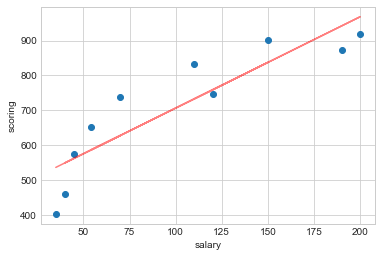

In [27]:
#2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring')

In [28]:
#3. Посчитайте коэффициент детерминации.
z1 = b0 + b1 * x1

def sum_of_squares(samples):
    return ((samples - samples.mean())**2).sum()

R1 = 1 - ((y1 - z1)**2).sum() / sum_of_squares(y1)
R1

0.7876386635293686

In [32]:
#4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [33]:
from scipy import stats

alpha = 0.5

t = stats.f.ppf(1 - alpha, k1, k2)
t

0.49898204652384914

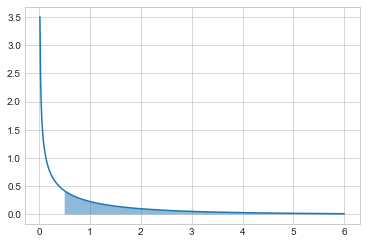

In [34]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha = 0.5)

In [35]:
F = (R1 / k1) / ((1 - R1) / k2)
F
#Статистика попала в критическую область, следовательно уравнение регрессии признается значимым

29.67164085966451

In [36]:
#5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)
    
#6. (доп) Посчитать среднюю ошибку аппроксимации

In [37]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

In [38]:
alpha = 0.5
n = x1.shape[0]
t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-0.7063866126448144, 0.7063866126448144)

In [39]:
(b1 + t1 * s_slope, b1 + t2 * s_slope)

(2.2807084359570275, 2.9603693288485022)

In [40]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [42]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

In [43]:
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)

(404.29017939161696, 484.06453525710225)